**Problema**

Luego de hablar con la gente de riesgos de la empresa se determina que la pregunta que ellos quisieran responder es:

¿Se puede predecir con precisión los costos del seguro?

Por el tipo de pregunta, se determina que la solución es utilizar algoritmos de regresión.


**Tareas**

Se deberá hacer un análisis exploratorio de los datos (EDA)

Para la predicción se hará un análisis de diversos algoritmos de regresión:

*	Multiple Linear Regression
*	Decision Tree Regression
*	Random Forest Regression
*	Support Vector Regression


**Datos**

Este conjunto de datos consta de 1337 filas y 7 columnas

Columnas:

*	Integer, age, Edad del asegurado
*	String, sex, Género
*	Integer, bmi, Indice de masa corporal
*	Integer, children, Número de hijos
*	Boolean, Smoker, Indicador si fuma
*	String, región, Región donde vive el asegurado
*	Integer, charges, Prima del seguro


In [0]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import matplotlib.gridspec as gridspec
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, init_notebook_mode
import seaborn as sb  # Imorting Seaborn library
from seaborn import violinplot

In [0]:
import warnings
warnings.filterwarnings('ignore')
sb.set_style('ticks')

In [0]:
# Importar modelos
from sklearn.linear_model import LinearRegression    # Importar modelo de regresión lineal
from sklearn.tree import DecisionTreeRegressor       # Modelo árboles de decisión
from sklearn.ensemble import RandomForestRegressor   # Modelo de Random Forest
from sklearn.svm import SVR                          # Modelo SVR

In [0]:
# Funciones para evaluar los modelos
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [0]:
#data
dt = pd.read_csv('https://raw.githubusercontent.com/omar-aromo/Final-OAL/master/insurance.csv', header=1)

In [0]:
# Almacenamos los datos originales en otra variable
dt_original = dt.copy()

In [81]:
dt.head() # Primeras 5 entradas del conjunto de datos

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [82]:
#Examinando la estructura de los datos
dt.info() # Mostrar información detallada para las columnas del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*   Integer, age, Edad del asegurado
*   Integer, age, Edad del asegurado
*   String, sex, Género
*   Integer, bmi, Indice de masa corporal
*   Integer, children, Número de hijos
*   Boolean, Smoker, Indicador si fuma
*   String, región, Región donde vive el asegurado
*   Integer, charges, Prima del seguro

In [83]:
dt.tail()  # Ultimas 5 entradas del conjunto de datos

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [84]:
dt.describe() # Imprimir tabla que contiene datos estadísticos del conjunto de datos

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Anális de la edad


```
```

Convertimos la edad en variables categóricas:
*    Adulto joven: de 18 a 35 años
*    Adulto mayor: de 36 a 55 años
*    Anciano: 56 años o más

In [85]:
#https://plotly.com/python/pie-charts/
dt['edad_cat'] = np.nan
lst = [dt]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'edad_cat'] = 'Adulto Joven'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'edad_cat'] = 'Adulto Mayor'
    col.loc[col['age'] > 55, 'edad_cat'] = 'Anciano'
    
    
etiquetas = dt["edad_cat"].unique().tolist()
monto = dt["edad_cat"].value_counts().tolist()

colores = ["#ff7f0e","#1f77b4","#17becf","#FF9B85","#60D394",]

trace = go.Pie(labels=etiquetas, values=monto,
               hoverinfo='percent+label', textinfo='value', 
               textfont=dict(size=12),
               hole=.4,
               marker=dict(colors=colores, 
                           line=dict(color='#000000', width=1)))

data = [trace]
layout = go.Layout(title="Monto por Edad")

fig = go.Figure(data=data, layout=layout)
fig.update_traces(textposition='inside', textinfo='percent+label')
iplot(fig, filename='graf_pastel')

**¿Existe una relación entre el BMI y la edad?**

In [86]:
bmi = [dt["bmi"].values.tolist()]
etiqueta = ['Distribución del índice de masa corporal']

color = ['#1f77b4']

fig = ff.create_distplot(bmi, etiqueta, colors=color)

fig['layout'].update(title='Distribución Normal <br> Condición del teorema del límite central')

iplot(fig, filename='DistNormal')



*   Frecuencia de BMI: la mayor parte de la frecuencia de BMI se concentra entre 27 y 33.

**CORRELACIÓN**

En esta parte encontraremos la matriz de correlación entre las columnas y la visualizaremos en un mapa de calor. De esta manera, podremos ver la relación entre los atributos más claramente

In [87]:
dt.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


La correlación es un número que indica cómo se relacionan los dos atributos entre sí. A medida que este número se acerca a 1.0, la relación se fortalece en la dirección correcta. A medida que se acerca a -1.0, se fortalece en la dirección opuesta. Si este valor es cercano a cero, el enlace entre los dos datos es débil. Un  ejemplo muy claro, en la matriz anterior, vemos un poco vinculado la edad de la persona y los valores de carga.

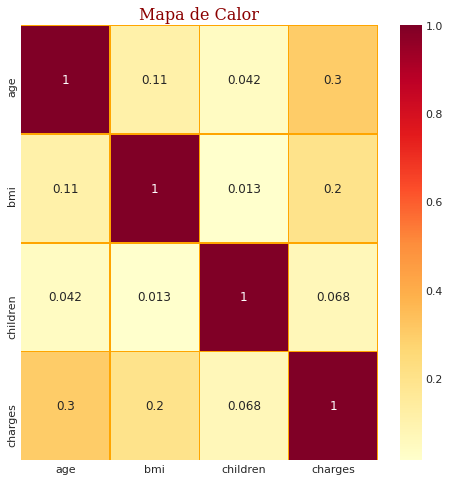

In [88]:

# https://likegeeks.com/seaborn-heatmap-tutorial/

font = {'family': 'serif', 'color':  'darkred', 'weight': 'normal', 'size': 16,}
etiqueta = 'Mapa de Calor'

fig, axes = plt.subplots(figsize=(8, 8))  # Este metdo crea una figura y un conjunto de subtramas
sb.heatmap(data=dt.corr(), annot=True, linewidths=.4, ax=axes, linecolor ='orange', cmap='YlOrRd')
# Algunos parametros:
# data : datos para el mapa de calor
# annot : Si es verdadero, escribe el valor de los datos en cada celda.
# linewidths : Ancho de las líneas que dividirán cada celda.
# ax : Ejes en los que ba a dibujar la trama, de lo contrario, utilizar los ejes actuales.
plt.title (etiqueta, fontdict=font)
plt.show()

* La edad y los cargos tienen una correlación de 0.29, mientras que el bmi y los cargos tienen una correlación de 0.19
* La correlación entre el BMI y la edad es 0.10, lo que no es tan bueno. Por lo tanto, podemos ignorar que la edad tiene una gran influencia en el BMI.

##Diversas visualizaciones del conjunto de datos
En esta parte haremos varias visualizaciones relacionadas con el conjunto de datos.

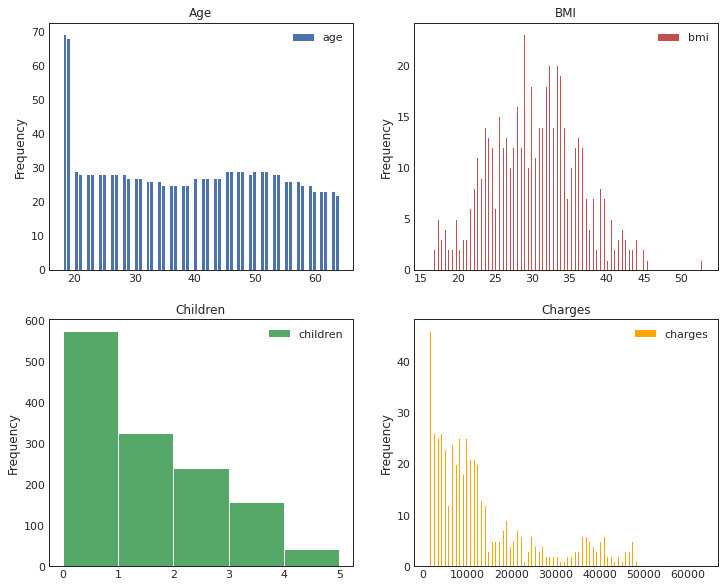

In [89]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

dt.plot(kind="hist", y="age",      bins=70,  color="b"     , ax=axes[0][0], title="Age")
dt.plot(kind="hist", y="bmi",      bins=200, color="r"     , ax=axes[0][1], title="BMI")
dt.plot(kind="hist", y="children", bins=5,   color="g"     , ax=axes[1][0], title="Children")
dt.plot(kind="hist", y="charges",  bins=200, color="orange", ax=axes[1][1], title="Charges")
plt.show()

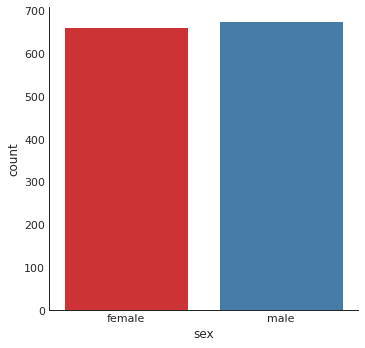

In [90]:
sb.catplot(x="sex", kind="count", palette="Set1", data=dt)

Dado que el valor a examinar es "charges", examinaremmos la relación de las otras columnas con este. Para hacer esto, se harán gráficos de dispersión entre las columnas numéricas y la columna de "charges"

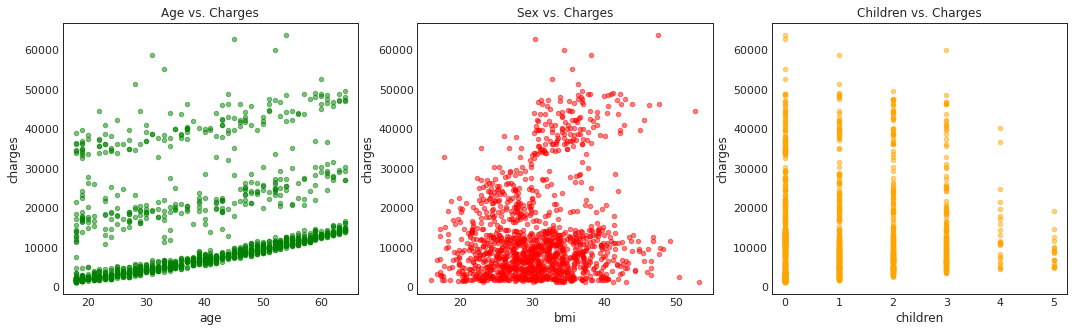

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
dt.plot(kind='scatter', x='age',      y='charges', alpha=0.5, color='green' , ax=axes[0], title="Age vs. Charges")
dt.plot(kind='scatter', x='bmi',      y='charges', alpha=0.5, color='red'   , ax=axes[1], title="Sex vs. Charges")
dt.plot(kind='scatter', x='children', y='charges', alpha=0.5, color='orange', ax=axes[2], title="Children vs. Charges")
plt.show()

Ahora la distribución de fumadores y no fumadores en el diagrama de dispersión de BMI vs.Charges

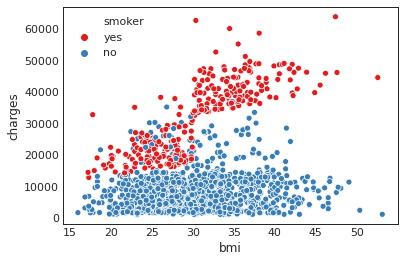

In [92]:
sb.scatterplot(x="bmi", y="charges", data=dt, palette='Set1', hue='smoker')

Convertimos el BMI en variables categóricas: https://www.who.int/features/factfiles/obesity/facts/es/

* Bajo peso: BMI <18.5
* Peso normal: BMI ≥18.5 & BMI <24.9
* Sobrepeso: BMI ≥25 & BMI <29.9
* Obeso: BMI >30

In [93]:
dt["condicion_peso"] = np.nan
lst = [dt]

for col in lst:
    col.loc[col["bmi"] < 18.5, "condicion_peso"] = "Bajo Peso"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "condicion_peso"] = "Peso Normal"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "condicion_peso"] = "Sobre Peso"
    col.loc[col["bmi"] >= 30, "condicion_peso"] = "Obeso"
    
dt.head()

,age,sex,bmi,children,smoker,region,charges,edad_cat,condicion_peso
0,19,female,27.900,0,yes,southwest,16884.92400,Adulto Joven,Sobre Peso
1,18,male,33.770,1,no,southeast,1725.55230,Adulto Joven,Obeso
2,28,male,33.000,3,no,southeast,4449.46200,Adulto Joven,Obeso
3,33,male,22.705,0,no,northwest,21984.47061,Adulto Joven,Peso Normal
4,32,male,28.880,0,no,northwest,3866.85520,Adulto Joven,Sobre Peso


¿Será que el grupo obesos esta en la parte superior?

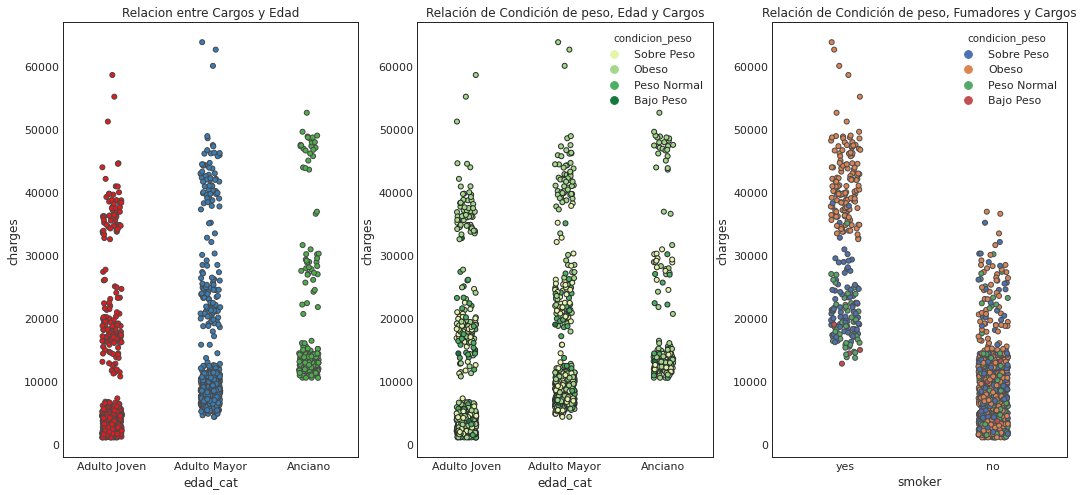

In [94]:
# grupo de colores:  https://eeecon.uibk.ac.at/~zeileis/assets/posts/2019-01-14-colorspace/hcl-palettes-1.png

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 8))
sb.stripplot(x="edad_cat", y="charges", data=dt,                       ax=ax1, linewidth=1, palette="Set1")
ax1.set_title("Relacion entre Cargos y Edad")
sb.stripplot(x="edad_cat", y="charges", data=dt, hue='condicion_peso', ax=ax2, linewidth=1, palette="YlGn")
ax2.set_title("Relación de Condición de peso, Edad y Cargos")
sb.stripplot(x="smoker",   y="charges", data=dt, hue='condicion_peso', ax=ax3, linewidth=1)
ax3.set_title("Relación de Condición de peso, Fumadores y Cargos")
plt.show()

La obesidad y el impacto de los fumadores

* En el gráfico anterior parece que fumar tiene un cierto impacto en los costos médicos.

Text(0.5, 1.0, 'Fumadores')

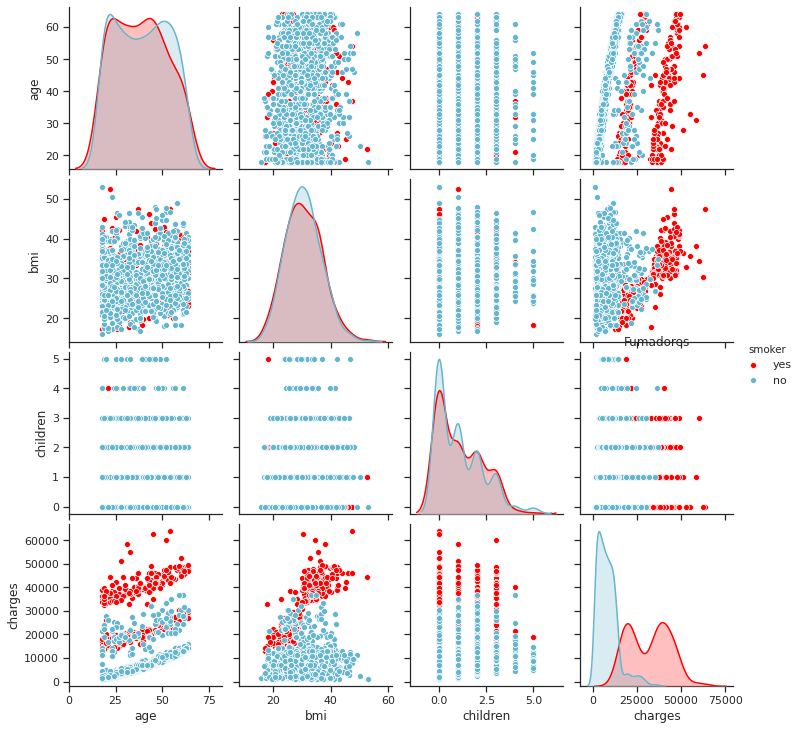

In [95]:
sb.set(style="ticks")
pal = ["red", "c"]

sb.pairplot(dt, hue="smoker", palette=pal)
plt.title("Fumadores")

Porcentaje de obesos fumadores y no fumadores

In [96]:
total_obesos = len(dt.loc[dt["condicion_peso"] == "Obeso"])

obeso_fumador_prop = len(dt.loc[(dt["condicion_peso"] == "Obeso") & (dt["smoker"] == "yes")])/total_obesos
obeso_fumador_prop = (round(obeso_fumador_prop, 2))*100

obeso_nofumador_prop = len(dt.loc[(dt["condicion_peso"] == "Obeso") & (dt["smoker"] == "no")])/total_obesos
obeso_nofumador_prop = (round(obeso_nofumador_prop, 2))*100

print ("El " + str(obeso_nofumador_prop) + " no es fumador")
print ("El " + str(obeso_fumador_prop) + " es fumador")

El 79.0 no es fumador
El 21.0 es fumador


**Distribución de cargos (fumador obeso versus no fumador obeso)**

Se utilizará gráficos de violín para comparar las distribuciones de pacientes del grupo de obesos que son fumadores y no fumadores.

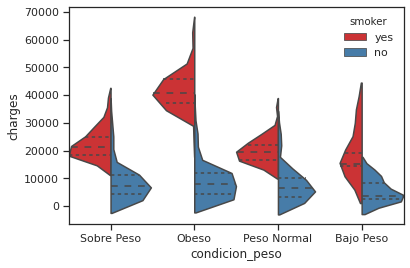

In [97]:
violinplot(x="condicion_peso", y="charges"    , hue="smoker",
           data=dt           , palette="Set1", split=True  ,
           inner="quartile", gridsize=10, width=1)

* La mayoría de los fumadores obesos pagan alrededor de 40k en costos médicos.
* La mayoría de los no fumadores obesos pagan 8k en costos médicos.
* Fumar es definitivamente un factor importante para los obesos, en lo que respecta al costo médico, se trata de una diferencia de +- 30k.

**Análisis por regiones**

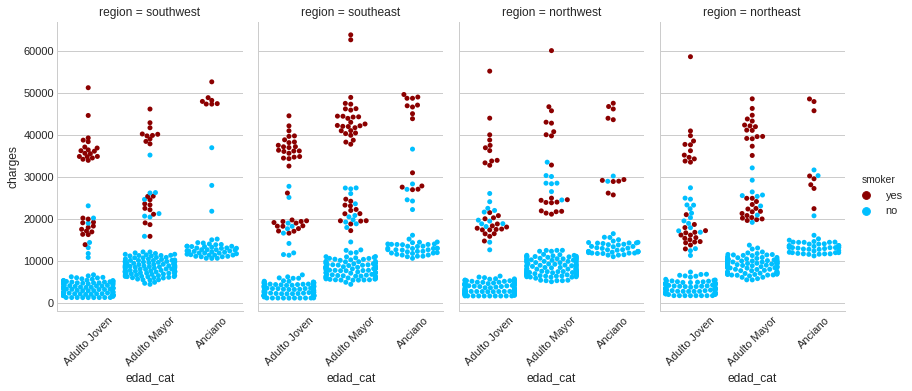

In [98]:
plt.style.use('seaborn-whitegrid')

marcador = dt['edad_cat'].unique()
colores = ['darkred', 'deepskyblue']


ax = sb.catplot(x="edad_cat", y="charges", hue="smoker",
                 col="region", aspect=.6,
                 kind="swarm", palette=colores, data=dt);

ax.set_xticklabels(labels = marcador, rotation=45)

plt.show()

Fumadores por región en numeros

In [99]:
dt.head()

region_fumador = pd.crosstab(dt['smoker'], dt['region']).apply(lambda x: round((x/x.sum()),4) * 100)
region_fumador

region,northeast,northwest,southeast,southwest
smoker,,,,
no,79.32,82.15,75.0,82.15
yes,20.68,17.85,25.0,17.85


# **PREPARACIÓN Y LIMPIEZA DE DATOS**



Usaremos las columnas "age", "sex", "bmi", "children" y "smoker" como datos, y usaremos la columna "charges" como objetivo.

Se descartará la columna "región" de estos datos, debido a que no se ha realizado un análizis mas minucioso y no se quiere reletizar el proceso dado el tiempo que tenemos disponible, pero esto no quiere decir que no le interese al negocio esta columna.

In [0]:
#eliminamos region, edad_cat y condicion_peso
dt.drop(["region", "edad_cat", "condicion_peso"], axis=1, inplace=True)

Aquí convertimos datos categóricos en datos numéricos.

Las columnas categóricas son sex y smoker. Los convertiremos de la siguiente forma:

     sex:    Si "hombre" es 0, "mujer" es 1.
     smoker: Si "no" es 0, "sí" es 1.

In [101]:
dt["sex"].replace({"female": 1, "male": 0}, inplace=True)
dt["smoker"].replace({"yes": 1, "no": 0}, inplace=True)
dt

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830
1334,18,1,31.920,0,0,2205.98080
1335,18,1,36.850,0,0,1629.83350
1336,21,1,25.800,0,0,2007.94500


In [102]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


Visulizar la distribución de carga para ver como se distribuye

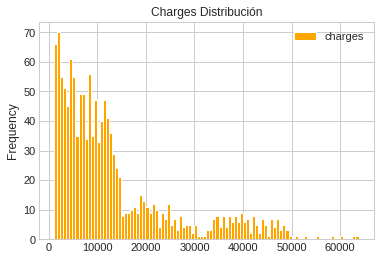

In [103]:
dt.plot(kind="hist", y="charges",  bins=100, color="orange", title="Charges Distribución")
plt.show()

¿Será mejor para el modelo si los cargos se distribuyen normalmente o tiene pocos valores atípicos?

Del análisis anterior, se puede observar lo siguiente:

1. No se distribuye normalmente.
2. Muy inclinado a la izquierda.
3. La distribución se ve muy afectada por los OUTLIERS.

Para resolver el problema, se utilizará la transformación de Logaritmo natural,de numpy, que lo que hace es reducir el sesgo hacia valores grandes, es decir, reducir outliers.

Esto se puede encontrar en: https://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html

In [0]:
dt.charges = np.log1p(dt.charges)

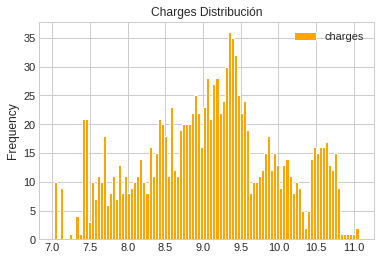

In [105]:
dt.plot(kind="hist", y="charges",  bins=100, color="orange", title="Charges Distribución")
plt.show()

Al parecer esta tecnica funcionó y tenemos normalizado los datos de cargos

**Preparación de datos de prueba y datos de entrenamiento**



In [0]:
X = dt.drop('charges', axis = 1).values
y = dt['charges'].values.reshape(-1,1)

In [0]:
# División del conjunto de datos en el conjunto de entrenamiento y el conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [108]:
print("X_train: ",X_train.shape)
print("X_test: " , X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: " ,y_test.shape)

X_train:  (1003, 5)
X_test:  (335, 5)
y_train:  (1003, 1)
y_test:  (335, 1)


# **CONSTRUCCIÓN DE MODELOS**

**Multiple Linear Regressión**

In [109]:
multiple_linear_reg = LinearRegression(fit_intercept=False)  # Crear una instancia para el modelo de regresión lineal
multiple_linear_reg.fit(X_train, y_train)  # Ajustar datos al modelo

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

**Arboles de decisión**

In [112]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Crear una instancia para el modelo Decision Tree
decision_tree_reg.fit(X_train, y_train)  # Ajustar datos al modelo

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

**Random Forest**

In [114]:
random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Crear una instancia para el modelo Random Forest
random_forest_reg.fit(X_train, y_train)  # Ajustar datos al modelo

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=13, verbose=0, warm_start=False)

**SVR (Support Vector Regression)**

In [115]:
support_vector_reg = SVR(gamma="auto", kernel="linear", C=1000)  # Crear una instancia para el modelo SVR
support_vector_reg.fit(X_train, y_train)  #Ajustar datos al modelo

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# **EVALUACIÓN DE LOS MODELOS**

**Evaluando la calidad de la regresión lineal**

https://iartificial.net/regresion-lineal-con-ejemplos-en-python/#Evaluando_la_calidad_de_la_regresion_lineal

In [117]:
# Predicción con el conjunto de datos de entrenamiento:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Predicción con el conjunto de datos de prueba:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Encuentra la precisión de entrenamiento para este modelo:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Encuentre la precisión de prueba para este modelo:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error):
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error):
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Predicción con validación cruzada:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Accuracy
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -0.9381933683100534
Testing Accuracy for Multiple Linear Regression Model:  -0.9002627687236782
RMSE for Training Data:  1.2745854196012616
RMSE for Testing Data:  1.2811390767806028
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  -0.9422347535191868


**Evaluando la calidad de el Arbol de Decisión**

In [118]:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

y_pred_DTR_test = decision_tree_reg.predict(X_test)

accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy: ", accuracy_DTR_train)

accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy: ", accuracy_DTR_test)

RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE Training Data: ", RMSE_DTR_train)

RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE Testing Data: ", RMSE_DTR_test)

y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy Cross Validation: ", accuracy_cv_DTR)

Training Accuracy:  0.847698651241226
Testing Accuracy:  0.8219347762189931
RMSE Training Data:  0.35729115840871867
RMSE Testing Data:  0.39217418552073013
Accuracy Cross Validation:  0.824621677271346


**Evaluando la calidad de Random Forest**

In [119]:
y_pred_RFR_train = random_forest_reg.predict(X_train)

y_pred_RFR_test = random_forest_reg.predict(X_test)

accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy: ", accuracy_RFR_train)

accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy: ", accuracy_RFR_test)

RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE Training Data: ", RMSE_RFR_train)

RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE Testing Data: ", RMSE_RFR_test)

y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy Cross Validation: ", accuracy_cv_RFR)

Training Accuracy:  0.8585696987356768
Testing Accuracy:  0.8268698157297684
RMSE Training Data:  0.34430365080211156
RMSE Testing Data:  0.38670148868717774
Accuracy Cross Validation:  0.8322213010281537


**Evaluando la calidad de SVR**

In [121]:
y_pred_SVR_train = support_vector_reg.predict(X_train)

y_pred_SVR_test = support_vector_reg.predict(X_test)

accuracy_SVR_train = r2_score(y_train, y_pred_SVR_train)
print("Training Accuracy: ", accuracy_SVR_train)

accuracy_SVR_test = r2_score(y_test, y_pred_SVR_test)
print("Testing Accuracy: ", accuracy_SVR_test)

RMSE_SVR_train = sqrt(mean_squared_error(y_train, y_pred_SVR_train))
print("RMSE Training Data: ", RMSE_SVR_train)

RMSE_SVR_test = sqrt(mean_squared_error(y_test, y_pred_SVR_test))
print("RMSE Testing Data: ", RMSE_SVR_test)

y_pred_cv_SVR = cross_val_predict(support_vector_reg, X, y, cv=10)

accuracy_cv_SVR = r2_score(y, y_pred_cv_SVR)
print("Accuracy Cross Validation: ", accuracy_cv_SVR)

Training Accuracy:  0.40942984435711716
Testing Accuracy:  0.42555091011515
RMSE Training Data:  0.7035681039155083
RMSE Testing Data:  0.7043933077553273
Accuracy Cross Validation:  -2.7627634633583824


Ponemos todos los resultados en una tabla

In [123]:
training_accuracies = [accuracy_MLR_train, accuracy_DTR_train, accuracy_RFR_train, accuracy_SVR_train]
testing_accuracies  = [accuracy_MLR_test , accuracy_DTR_test , accuracy_RFR_test , accuracy_SVR_test]
training_RMSE       = [RMSE_MLR_train    , RMSE_DTR_train    , RMSE_RFR_train    , RMSE_SVR_train]
testing_RMSE        = [RMSE_MLR_test     , RMSE_DTR_test     , RMSE_RFR_test     , RMSE_SVR_test]
cv_accuracies       = [accuracy_cv_MLR   , accuracy_cv_DTR   , accuracy_cv_RFR   , accuracy_cv_SVR]

datos_tabla = {"Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
               "Training RMSE": training_RMSE          , "Testing RMSE": testing_RMSE,
               "CV": cv_accuracies}

nombres_modelos = ["Multiple Linear Regression", "Decision Tree", "Random Forest", "SVR"]

tabla_datos = pd.DataFrame(data=datos_tabla, index=nombres_modelos)
tabla_datos

,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,CV
Multiple Linear Regression,-0.938193,-0.900263,1.274585,1.281139,-0.942235
Decision Tree,0.847699,0.821935,0.357291,0.392174,0.824622
Random Forest,0.858570,0.826870,0.344304,0.386701,0.832221
SVR,0.409430,0.425551,0.703568,0.704393,-2.762763


Visualización del rendimiento de los modelos

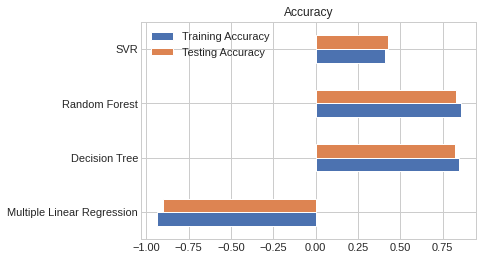

In [164]:
tabla_datos.iloc[:, 0:2].plot(kind="barh", ylim=[0.0, 1.0])
plt.title("Accuracy")
plt.show()

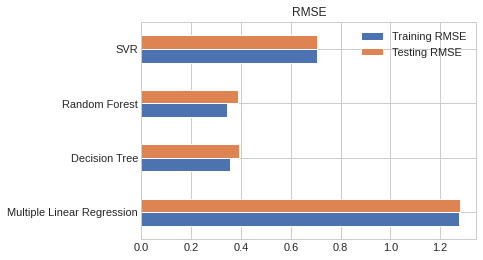

In [167]:
tabla_datos.iloc[:, 2:4].plot(kind="barh", ylim=[0.0, 1.0])
plt.title("RMSE")
plt.show()

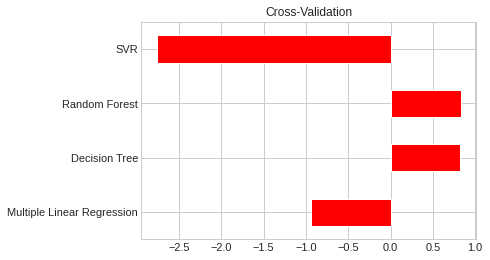

In [166]:
tabla_datos.iloc[:, 4].plot(kind='barh',x=nombres_modelos,y=tabla_datos.CV,color='red', )
plt.title("Cross-Validation")
plt.show()

# **RESUMEN FINAL**

* Random Forest y Decision Tree dieron resultados muy cercanos. Otros modelos dieron negativo. Puede haber varias razones por las cuales dieron estos resultados. En primer lugar, puede ser que haya hecho falta un poco mas de ingeniería de características y recurrimos a otros métodos como PCA. Además, el hecho de que el conjunto de datos sea pequeño también puede ser un factor.

* Los parámetros de estos métodos pueden optimizarse aún más para obtener mejores resultados. Pero siempre se debe prestar atención al nivel de optimización para evitar caer en la trampa de sobreajuste. Además, también es bueno mantener cierta variabilidad en el modelo. Solo para estar seguro de que el modelo reaccionará a los nuevos datos.

* **En este ejercicio se trabajo los siguinetes temas**:

  1. Análisis de datos exploratorios (EDA)
  2. Encontrar y visualizar la correlación entre características en los datos
  3. Visualizaciones sobre el conjunto de datos
  4. Uso de bibliotecas como Pandas, Matplotlib, Seaborn y Scikit-Learn
  5. Limpieza de datos
  6. Dividir el conjunto de datos en prueba y entrenamiento
  7. Modelos de Machine Learning
  8. Evaluación de modelos de regresión
  9. Valores RMSE (error cuadrático medio)
  10. Cross Validation
  11. Comparar e interpretar visualmente los modelos evaluados

* **Resumen de EDA**
1. Fumar parece ser, con mucho, la característica más importante para determinar los cargos. Hay una diferencia muy pequeña entre sexos y fumar.
2. La edad tiene una relación positiva con los cargos. Las relaciones de los no fumadores son más consistentes que las de los no fumadores.
3. Existe una relación positiva muy fuerte entre el bmi-fumador y los cargos médicos más altos. (más en el caso de las mujeres que de los hombres).
4. Para fumadores, con BMI> 30, los costos médicos parecen dispararse.